#### Python Notebook: Abhishek Dubey
#### Contact: abhishekdubey.irl@gmail.com

### Problem: 

work is mainly based on Vehicle data (Cars) we analyse all possible raw information we can get to achieve knowledge and insights on the situation.

One of the sources of data is generated from the CAN-ODB port of the Car. This port gives information about the Car such as the engine speed, the torque, fuel consumption, etc. The port is extremely sensitive and will provide data at approx. 20-25 Frames per second.
These frames are called CAN frames, where each frame consists of the Timestamp, hexadecimal ID, and a Hexadecimal message. “CAN_log.asc” file is a log file with all the CAN frames for a car.
 
The hexadecimal message is decoded to get the variables and their values at that timestamp like engine speed, torque, etc.
To decode these frames, you need a “.dbc” file it is called a CAN database file. The file describes the meaning and format of decoding the hexadecimal messages using the hexadecimal IDs in the frame.
Let us consider the following frame as an example:
 
Here 208 is the hexadecimal ID and 1F 45 3E 0B 4C 3E 32 3F is the hexadecimal message.
 
The above snippet is from “CAN.dbc”, here the ID 520 is the decimal id for the hexadecimal id 208. Below the ID is the description of how the hexadecimal message will be decoded to find the corresponding variables. 
The variables are in French so Regime_moteur is engine speed.
##### Your Task is to:
1)	Decode only frames with ID 208 and extract only the values for variable “Regime_moteur”. Retain the corresponding timestamp as well.
2)	Then create an interactive plot where:
3)	y axis is Regime_moteur – The values are normalised using min-max normalization min=0 and max = 5000
4)	x axis is the timestamp – Format “HH:MM: SS”.
5)	Then store it in the form of an output video/gif

### Solution:

#### Python 3.9.1


Import Libraries 

Cantools for Can files 

Matplotlib for plotting graph and animation

pandas for working in data frames

numpy for creating array for value insertation

print for pillow and printing image

In [1]:
import cantools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

Creating data frame from CAN_log.asc file. for reading in pandas we are using read_csv and .txt file extension

In [2]:
df = pd.read_csv(r"C:\Users\abhis\Desktop\CleanData Technical Assessment Python Developer_Mar21 (1)\CAN_log.txt", skiprows=1, sep='\s+')


c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,0.008203,2,319,Rx,d,8,0A,7F,97,D3,74,6F,DA,F7,Length,=,222000,BitCount,=.1,115
0,0.008745,2,432,Rx,d,6,81,55,48,00,00,00,Length,=,196000,BitCount,=,102,NaN,NaN
1,0.009197,2,305,Rx,d,6,FE,B6,0B,07,BB,08,Length,=,194000,BitCount,=,101,NaN,NaN
2,0.00985,2,3CD,Rx,d,8,FF,F6,7F,FF,00,23,50,00,Length,=,232000,BitCount,=,120.0
3,0.010072,2,34D,Rx,d,7,10,03,FA,FA,00,0A,00,Length,=,214000,BitCount,=,111,NaN
4,0.010594,2,208,Rx,d,8,1F,45,3E,0B,4C,3E,32,3F,Length,=,234000,BitCount,=,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66739,90.610369,2,34D,Rx,d,7,10,03,FA,FA,00,0C,00,Length,=,216000,BitCount,=,112,NaN
66740,90.613737,2,305,Rx,d,6,FD,8A,00,07,61,00,Length,=,192000,BitCount,=,100,NaN,NaN
66741,90.614161,2,432,Rx,d,6,81,57,48,00,00,00,Length,=,198000,BitCount,=,103,NaN,NaN
66742,90.616029,2,319,Rx,d,8,0A,7F,77,FA,73,6F,DA,F7,Length,=,222000,BitCount,=,115.0


## Cleaning Data

Selecting some rows like hex message, hex id and time

In [4]:
df=df[["0.008203","319","0A","7F","97","D3","74","6F","DA","F7"]]

#### Also as per question we only need id with 208 so i am ignoring all from data frame

In [5]:
df=df.loc[df["319"] == "208"]

In [6]:
df

,0.008203,319,0A,7F,97,D3,74,6F,DA,F7
4,0.010594,208,1F,45,3E,0B,4C,3E,32,3F
10,0.020411,208,1F,27,3F,0B,4C,3F,32,3F
18,0.030663,208,1F,0D,3F,0B,4C,3F,32,3F
25,0.040508,208,1E,F6,3F,0B,4C,3F,32,3F
32,0.05053,208,1E,DA,3F,0B,4C,3F,32,3F
...,...,...,...,...,...,...,...,...,...,...
66706,90.568146,208,17,68,37,00,4E,37,27,27
66716,90.577990,208,17,68,37,00,4E,37,27,27
66722,90.588301,208,17,68,37,00,4E,37,27,27
66729,90.598186,208,17,68,37,00,4E,37,27,27


Merging all Hex Message in one coloumn

In [7]:
df['Hexadecimal Message']=df['0A']+' '+df['7F']+' '+df['97']+' '+df['D3']+' '+df['74']+' '+df['6F']+' '+df['DA']+' '+df['F7']

In [8]:
df=df.rename(columns={"0.008203": "Timestamp", "319": "Hexa id"})

renaming columns

In [9]:
df = df[["Timestamp","Hexa id","Hexadecimal Message"]]
df.reset_index(drop=True)

,Timestamp,Hexa id,Hexadecimal Message
0,0.010594,208,1F 45 3E 0B 4C 3E 32 3F
1,0.020411,208,1F 27 3F 0B 4C 3F 32 3F
2,0.030663,208,1F 0D 3F 0B 4C 3F 32 3F
3,0.040508,208,1E F6 3F 0B 4C 3F 32 3F
4,0.05053,208,1E DA 3F 0B 4C 3F 32 3F
...,...,...,...
9056,90.568146,208,17 68 37 00 4E 37 27 27
9057,90.577990,208,17 68 37 00 4E 37 27 27
9058,90.588301,208,17 68 37 00 4E 37 27 27
9059,90.598186,208,17 68 37 00 4E 37 27 27


Cleaning Done in Dataframe 

In [10]:
df

,Timestamp,Hexa id,Hexadecimal Message
4,0.010594,208,1F 45 3E 0B 4C 3E 32 3F
10,0.020411,208,1F 27 3F 0B 4C 3F 32 3F
18,0.030663,208,1F 0D 3F 0B 4C 3F 32 3F
25,0.040508,208,1E F6 3F 0B 4C 3F 32 3F
32,0.05053,208,1E DA 3F 0B 4C 3F 32 3F
...,...,...,...
66706,90.568146,208,17 68 37 00 4E 37 27 27
66716,90.577990,208,17 68 37 00 4E 37 27 27
66722,90.588301,208,17 68 37 00 4E 37 27 27
66729,90.598186,208,17 68 37 00 4E 37 27 27


In [11]:
df["Timestamp"] = df["Timestamp"].astype(float)
df["Hexa id"] = df["Hexa id"].astype(int)

changing the datatypes for columns

In [12]:
df.dtypes

Timestamp              float64
Hexa id                  int32
Hexadecimal Message     object
dtype: object

Changing Timestamp to HH:MM:SS format

@ it is unclear in question it is written to convert all timestamp to HH:MM:SS

@ Because we can convert it to string but when we will convert it to datetime (datatype) format it will not allowed
 Example: for time greater than 24:00:01 
 
Assumption: So I am taking it as HH:MM:SS to all values as stated in question, so values will go till 90 hours


In [13]:
time = df["Timestamp"]

a=[]
for time in df["Timestamp"]:
    hours = int(time)
    minutes = (time*60) % 60
    seconds = (time*3600) % 60

    b=("%d:%02d:%02d" % (hours, minutes, seconds))
    a.append(str(b))

df1 = pd.DataFrame(a)
df1

,0
0,0:00:38
1,0:01:13
2,0:01:50
3,0:02:25
4,0:03:01
...,...
9056,90:34:05
9057,90:34:40
9058,90:35:17
9059,90:35:53


renaming columns to timestamp hh:mm:ss

In [14]:
df1=df1.rename(columns={0: "timestamp hh:mm:ss"})

In [15]:
df1

,timestamp hh:mm:ss
0,0:00:38
1,0:01:13
2,0:01:50
3,0:02:25
4,0:03:01
...,...
9056,90:34:05
9057,90:34:40
9058,90:35:17
9059,90:35:53


## Working with CAN File

#### Direct importing .dbc file from my machine

In [16]:
db = cantools.database.load_file(r'C:\Users\abhis\Desktop\CleanData Technical Assessment Python Developer_Mar21 (1)\CAN.dbc')

In [17]:
db.messages

[message('IS_Dyn_CMM_208', 0x208, False, 8, {None: '(A) moteur essence avec papillon motoris‚ : voir STE 96 320 352  (MOT / CME)\n(B) moteur essence sans papillon motoris‚ :  voir STE 96 323 037 (MOT / CME)\n(C) moteur diesel :'}),
 message('IS_Vers_ACCEL_119', 0x119, False, 8, None),
 message('IS_Vers_CAAR_118', 0x118, False, 8, None),
 message('IS_Vers_PROJ_117', 0x117, False, 8, None),
 message('IS_Vers_DIRA_115', 0x115, False, 8, None),
 message('IS_Vers_EPB_113', 0x113, False, 8, None),
 message('IS_Vers_BSI_112', 0x112, False, 8, None),
 message('IS_Vers_DSG_10F', 0x10f, False, 8, None),
 message('IS_Vers_ABR_10D', 0x10d, False, 8, None),
 message('IS_Vers_SBW_10A', 0x10a, False, 8, None),
 message('IS_Vers_BV_109', 0x109, False, 8, None),
 message('IS_Vers_CMM_108', 0x108, False, 8, None),
 message('IS_Vers_VOL_105', 0x105, False, 8, None),
 message('IS_CFD_BSI_CMM_0A8', 0xa8, False, 5, {None: 'Pour ADC2:\nDescription fonctionnelle dans  STE 96.293.986.9A (pour CMM) .\nD‚finitio

#### We only need message for the hexadecimal id 208 and Decimal id 520 

In [18]:
example_message = db.get_message_by_name('IS_Dyn_CMM_208')

#### Printing all signals

In [19]:
pprint(example_message.signals)

[signal('Regime_moteur', 7, 16, 'big_endian', False, None, 0.125, 0, 0, 8191.75, 'RPM', False, None, None, None, {None: 'Calcul … chaque PMH\nPr‚cision sur un tour : mieux que 3 t/min en dessous de 3000 t/min\nValeur en dessous de 300 t/min : 0\n32 RPM par bit MSB'}),
 signal('Couple_reel', 23, 8, 'big_endian', False, None, 2, -100, -100, 408, 'N.m', False, None, None, None, None),
 signal('Volonte_cond', 31, 8, 'big_endian', False, None, 0.5, 0, 0, 100, '%', False, None, None, None, {None: "Cas d'un capteur fournissant 2 informations : l'information envoy‚e est l'information principale.\nSi un d‚faut est d‚tect‚ sur cette information, on envoie alors l'information secondaire.\nSi un d‚fa"}),
 signal('Req_charge_mot', 39, 1, 'big_endian', False, None, 1, 0, None, None, 'None', False, None, None, None, {None: 'selon v‚hicule'}),
 signal('Diag_mux_on', 38, 1, 'big_endian', False, None, 1, 0, None, None, 'None', False, None, None, None, None),
 signal('Cple_MT_incertains', 36, 1, 'big_end

### Parsing all Hexadecimal Message one by one to decode_message function using .dbc file with message IS_Dyn_CMM_208

### For This i am using For Loop and appending in LIST

### We all knows in Python List are Mutable 

In [20]:

var=[]
for index in df["Hexadecimal Message"]:
    decoded1 = db.decode_message('IS_Dyn_CMM_208', bytes.fromhex(index))
    frame=(decoded1)
    var.append(frame)

df2 = pd.DataFrame(var)
df2


,Regime_moteur,Couple_reel,Volonte_cond,Req_charge_mot,Diag_mux_on,Cple_MT_incertains,Etat_RVV_LVV,Contact_frein2,Cple_pot_apr_trt,Cple_anticipe,Cple_cond_apr_trt
0,1000.625,24,5.5,0,1,0,Régul inhibée,Relaché,24,0,26
1,996.875,26,5.5,0,1,0,Régul inhibée,Relaché,26,0,26
2,993.625,26,5.5,0,1,0,Régul inhibée,Relaché,26,0,26
3,990.750,26,5.5,0,1,0,Régul inhibée,Relaché,26,0,26
4,987.250,26,5.5,0,1,0,Régul inhibée,Relaché,26,0,26
...,...,...,...,...,...,...,...,...,...,...,...
9056,749.000,10,0.0,0,1,0,Régul inhibée,Appuyé,10,-22,-22
9057,749.000,10,0.0,0,1,0,Régul inhibée,Appuyé,10,-22,-22
9058,749.000,10,0.0,0,1,0,Régul inhibée,Appuyé,10,-22,-22
9059,749.000,10,0.0,0,1,0,Régul inhibée,Appuyé,10,-22,-22


#### We only need Regime_moteur Column

### As stated in question we have to use MAX - MIN Normalization, and it is given to take Min = 0 and Max = 5000

### Normalization formula ((value-min)/(max-min))

In [21]:
df2["normalized_Regime_moteur"]=((df2["Regime_moteur"]-0)/(5000-0))

In [22]:
df2

,Regime_moteur,Couple_reel,Volonte_cond,Req_charge_mot,Diag_mux_on,Cple_MT_incertains,Etat_RVV_LVV,Contact_frein2,Cple_pot_apr_trt,Cple_anticipe,Cple_cond_apr_trt,normalized_Regime_moteur
0,1000.625,24,5.5,0,1,0,Régul inhibée,Relaché,24,0,26,0.200125
1,996.875,26,5.5,0,1,0,Régul inhibée,Relaché,26,0,26,0.199375
2,993.625,26,5.5,0,1,0,Régul inhibée,Relaché,26,0,26,0.198725
3,990.750,26,5.5,0,1,0,Régul inhibée,Relaché,26,0,26,0.198150
4,987.250,26,5.5,0,1,0,Régul inhibée,Relaché,26,0,26,0.197450
...,...,...,...,...,...,...,...,...,...,...,...,...
9056,749.000,10,0.0,0,1,0,Régul inhibée,Appuyé,10,-22,-22,0.149800
9057,749.000,10,0.0,0,1,0,Régul inhibée,Appuyé,10,-22,-22,0.149800
9058,749.000,10,0.0,0,1,0,Régul inhibée,Appuyé,10,-22,-22,0.149800
9059,749.000,10,0.0,0,1,0,Régul inhibée,Appuyé,10,-22,-22,0.149800


### Creating final Dataframe for graph - df_final

In [23]:
df_final = pd.concat([df1["timestamp hh:mm:ss"], df2["normalized_Regime_moteur"]], axis=1)
df_final= df_final.set_index("timestamp hh:mm:ss")

In [24]:
df_final

,normalized_Regime_moteur
timestamp hh:mm:ss,
0:00:38,0.200125
0:01:13,0.199375
0:01:50,0.198725
0:02:25,0.198150
0:03:01,0.197450
...,...
90:34:05,0.149800
90:34:40,0.149800
90:35:17,0.149800


In [25]:
df_final.head(30)

,normalized_Regime_moteur
timestamp hh:mm:ss,
0:00:38,0.200125
0:01:13,0.199375
0:01:50,0.198725
0:02:25,0.198150
0:03:01,0.197450
0:03:37,0.196850
0:04:14,0.196325
0:04:49,0.195625
0:05:25,0.195025


#### We are exporting the the final dataframe file, just for submitting file, along with code

In [26]:
df_final.to_excel("engine.xlsx") 

## Final Plot Between Regime_moteur and Time in HH:MM:SS

<AxesSubplot:xlabel='timestamp hh:mm:ss'>

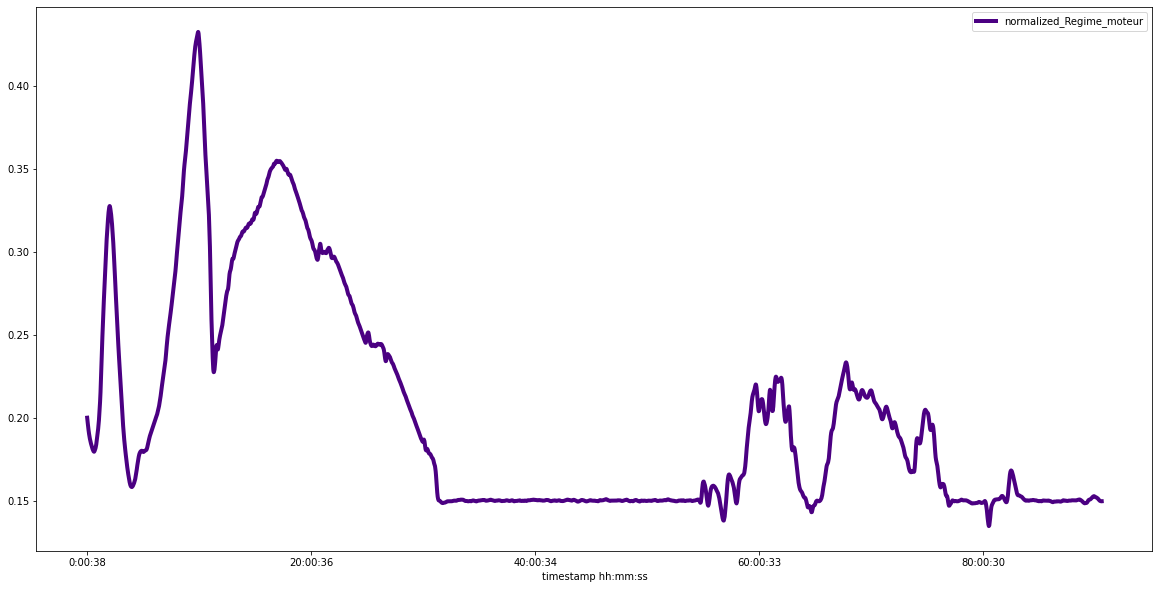

In [27]:
df_final.plot(kind="line",figsize=(20,10),  linewidth=4, color='#4b0082')

### Creating Visualization in GIF Format

In [28]:
import matplotlib.animation as animation

### Using Matplotlib Animation function

### Also we are creating list type data from both x and y columns for craeting .gif

#### We tried using all rows 9061, but it requires heavy processing power to create .gif file. For me it is taking so much time and it shows memory out of space.

#### So for expressing knowledge i am using only top 100 rows, so that it will give an idea how output will look like in gif format

#### df_final["normalized_Regime_moteur"].head(100) and df1["timestamp hh:mm:ss"].head(100)::  -- taking top 100 rows and plotting them in .gif format

#### If you have greater processing power/memory and  want to use whole 9061 rows, just use df_final["normalized_Regime_moteur"]  and df1["timestamp hh:mm:ss"] only 

### Gif will be stored in local directory

In [29]:
y=[]

for a in df_final["normalized_Regime_moteur"].head(100):
    y.append(a)

x=[]

for a in df1["timestamp hh:mm:ss"].head(100):
    x.append(a)

print(x)

print(y)

['0:00:38', '0:01:13', '0:01:50', '0:02:25', '0:03:01', '0:03:37', '0:04:14', '0:04:49', '0:05:25', '0:06:01', '0:06:38', '0:07:13', '0:07:49', '0:08:29', '0:09:02', '0:09:37', '0:10:13', '0:10:49', '0:11:26', '0:12:01', '0:12:37', '0:13:13', '0:13:49', '0:14:25', '0:15:01', '0:15:37', '0:16:14', '0:16:49', '0:17:25', '0:18:01', '0:18:38', '0:19:14', '0:19:49', '0:20:25', '0:21:02', '0:21:38', '0:22:18', '0:22:49', '0:23:26', '0:24:01', '0:24:38', '0:25:13', '0:25:50', '0:26:25', '0:27:01', '0:27:37', '0:28:17', '0:28:49', '0:29:25', '0:30:01', '0:30:38', '0:31:14', '0:31:49', '0:32:24', '0:33:01', '0:33:38', '0:34:14', '0:34:49', '0:35:25', '0:36:02', '0:36:37', '0:37:13', '0:37:49', '0:38:25', '0:39:01', '0:39:37', '0:40:17', '0:40:49', '0:41:25', '0:42:01', '0:42:38', '0:43:13', '0:43:49', '0:44:25', '0:45:02', '0:45:37', '0:46:14', '0:46:49', '0:47:26', '0:48:01', '0:48:37', '0:49:13', '0:49:53', '0:50:25', '0:51:01', '0:51:37', '0:52:14', '0:52:49', '0:53:25', '0:54:01', '0:54:38'

### This Process will take lot of time, as we have more than 9000 rows to plot 

### Output file will be generated as output_Regime_moteur_vs_time.gif format and saved to local directory

### Meanwhile i have also created another motion chart in Tableau, just to understanding.

### Its a running video for all 9061 rows with better clearity

### <span style="color:red">So, I recommend you to please open "Regime_moteur with Time in HH:MM:SS.twbx" separately, file in zip folder.</span>

#### Happy Learning

MovieWriter ffmpeg unavailable; using Pillow instead.


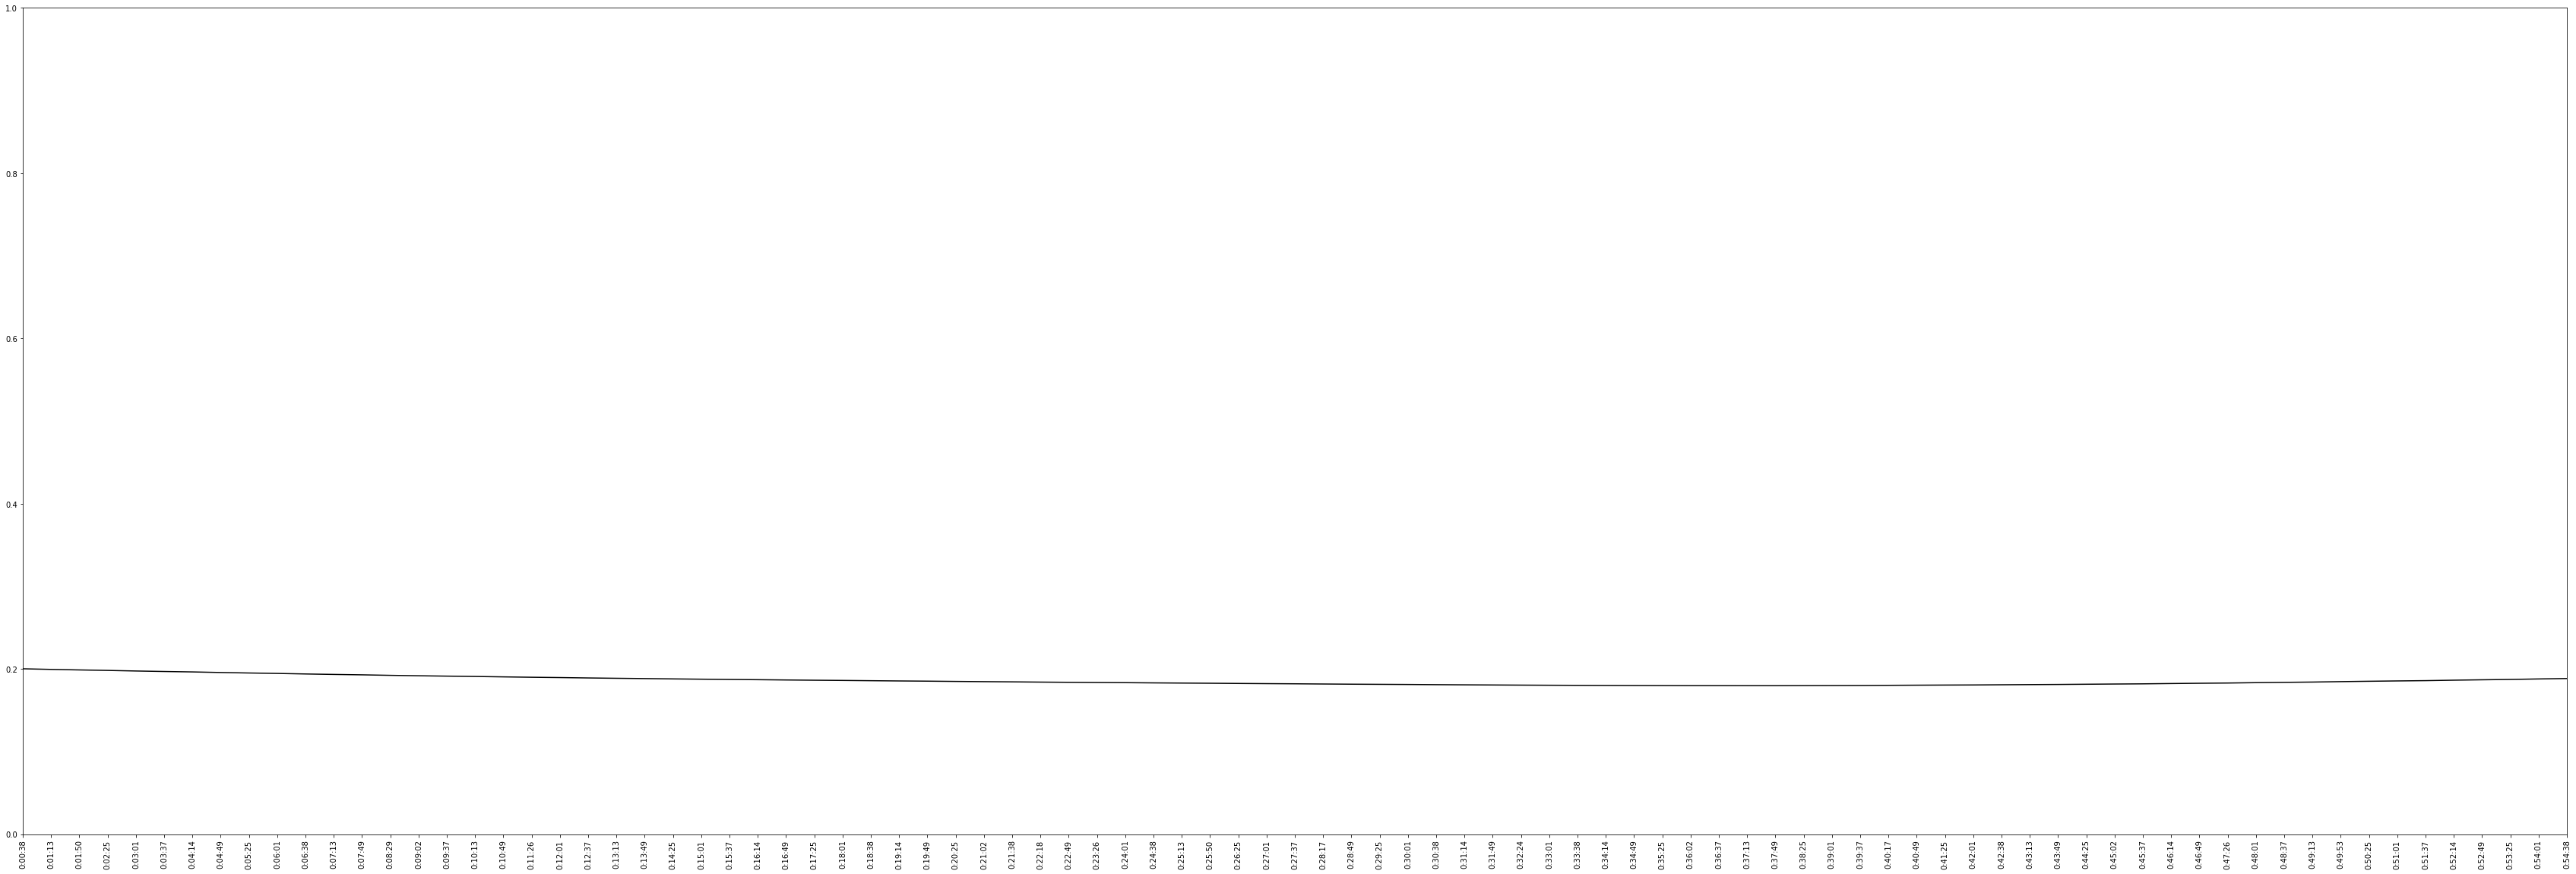

gif created - check your local directory


In [30]:

#creating subplot for graphs
fig, ax = plt.subplots(figsize=(60, 20))
line, = ax.plot(x, y, color='k')
plt.xticks(rotation=90)

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 90, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
ani.save('output_Regime_moteur_vs_time.gif')
plt.show()
print("gif created - check your local directory")

### Hope you will like my efforts and believe me i can do more, just need a chance and platform.

### Thanks- Abhishek Dubey